In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Johnny\Desktop\RKI\RKI_COVID19.csv")
data.shape

(616183, 18)

In [3]:
data.head(15)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Kiel,A15-A34,M,2,0,2020/10/23 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/21 00:00:00,0,2,1,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/23 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/23 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/24 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/14 00:00:00,0,1,1,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/24 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/19 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/24 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/20 00:00:00,0,1,1,Nicht übermittelt
5,6,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/26 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/23 00:00:00,0,1,1,Nicht übermittelt
6,7,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/10/27 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/22 00:00:00,0,1,1,Nicht übermittelt
7,8,1,Schleswig-Holstein,SK Kiel,A15-A34,M,2,0,2020/10/27 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/23 00:00:00,0,2,1,Nicht übermittelt
8,9,1,Schleswig-Holstein,SK Kiel,A15-A34,M,2,0,2020/10/27 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/24 00:00:00,0,2,1,Nicht übermittelt
9,10,1,Schleswig-Holstein,SK Kiel,A15-A34,M,2,0,2020/10/28 00:00:00,1002,"03.12.2020, 00:00 Uhr",0,-9,2020/10/24 00:00:00,0,2,1,Nicht übermittelt


In [4]:
# look at unqiue values in each column
for index, c in enumerate(data.columns):
    print(index, c, len(data[c].unique()))

0 ObjectId 616183
1 IdBundesland 16
2 Bundesland 16
3 Landkreis 412
4 Altersgruppe 7
5 Geschlecht 3
6 AnzahlFall 110
7 AnzahlTodesfall 10
8 Meldedatum 299
9 IdLandkreis 412
10 Datenstand 1
11 NeuerFall 3
12 NeuerTodesfall 4
13 Refdatum 336
14 NeuGenesen 4
15 AnzahlGenesen 100
16 IstErkrankungsbeginn 2
17 Altersgruppe2 1


In [5]:
# drop rows with a single value
data.drop(["Altersgruppe2", "Datenstand"], axis=1, inplace=True)

In [6]:
def group_cases_by_key(key, df, values="AnzahlFall"):
    grp = df.groupby([key])
    case_dict = {}
    for c in df[key].unique():
        fälle = grp.get_group(c)[values].sum()
        case_dict[c] = fälle
    return case_dict

([<matplotlib.patches.Wedge at 0x1ebf24a1808>,
 [Text(0.05036574256346833, 1.0988463459356048, 'Male'),
  Text(-0.07661150102466183, -1.097328883202638, 'Female'),
  Text(1.0996858443428437, -0.026287711044658293, 'NA')])

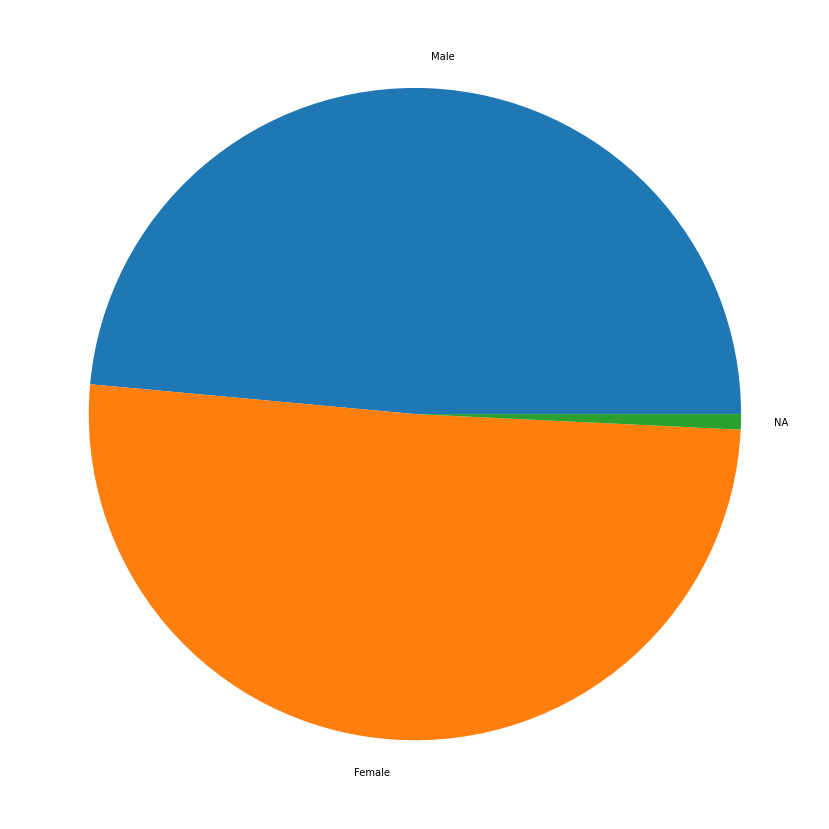

In [18]:
gender_dict = group_cases_by_key("Geschlecht", data)
plt.figure(figsize=(15, 15))
plt.pie(gender_dict.values(), labels=["Male", "Female", "NA"])

In [8]:
bundesländer = data.groupby(["Bundesland"])
bl_fälle = {}
for c in data["Bundesland"].unique():
    fälle = bundesländer.get_group(c)["AnzahlFall"].sum()
    bl_fälle[c] = fälle
bl_fälle["Deutschland"] = sum(bl_fälle.values())

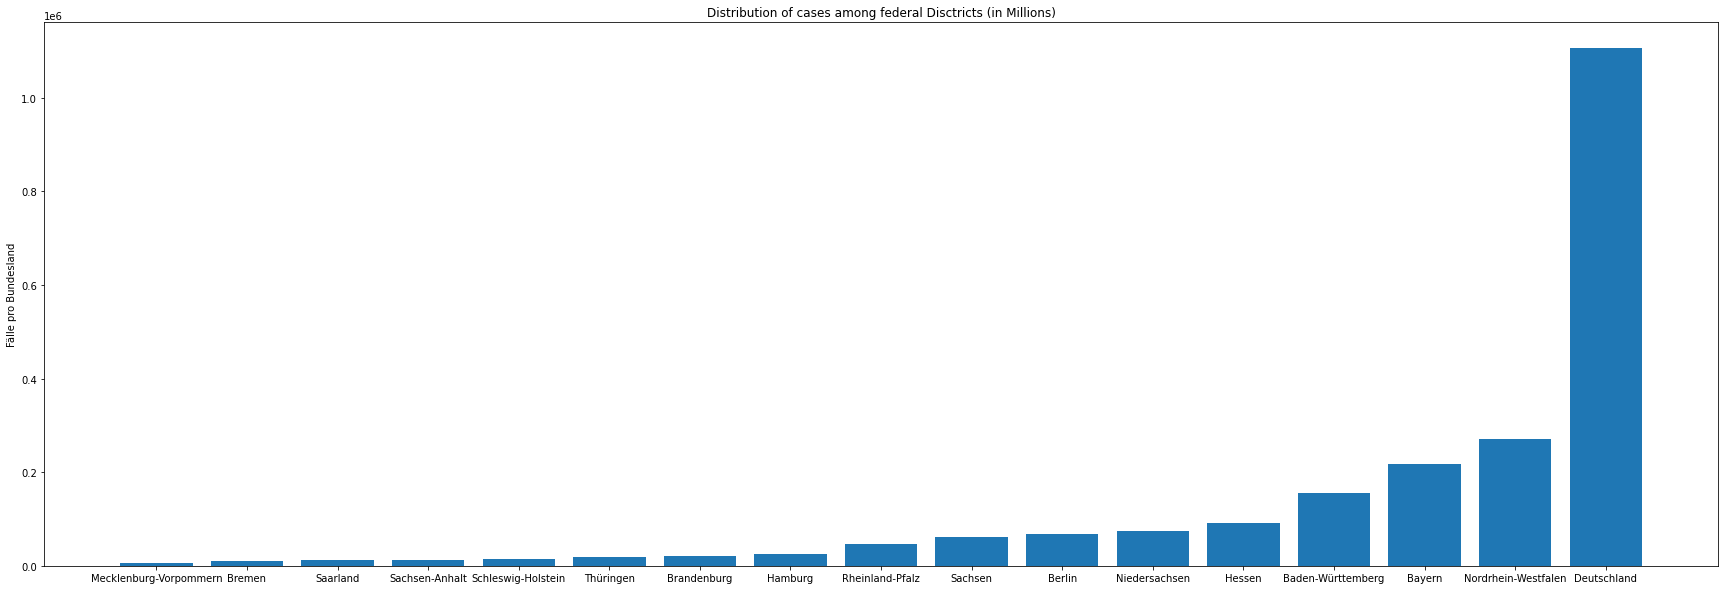

In [9]:
# plot cases across federal disctricts
bl_fälle = {bl: fälle for bl, fälle in sorted(bl_fälle.items(), key=lambda x: x[1])}
plt.figure(figsize=(30, 10))
plt.title("Distribution of cases among federal Disctricts (in Millions)")
plt.bar(bl_fälle.keys(), bl_fälle.values())
plt.ylabel("Fälle pro Bundesland")
plt.show()

In [10]:
get_inhabitants = True
if get_inhabitants:
    einwohner_dict = {}
    import requests
    from bs4 import BeautifulSoup
    URL = r"https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Bev%C3%B6lkerung"
    soup = BeautifulSoup(requests.get(URL).text)
    table = soup.find_all("tr")[1:]
    for row in table:
        values = [row for row in str(row.text).splitlines() if row != ""]
        distr = values[0].split()[0]
        einw_zahl = values[-1]
        if distr != "Bundesland":
            if distr in ["Deutschland[2]", "Berlin[1]"]:
                distr = distr[:-3]
            einw_zahl = int(einw_zahl.replace(".", ""))
            einwohner_dict[distr] = einw_zahl

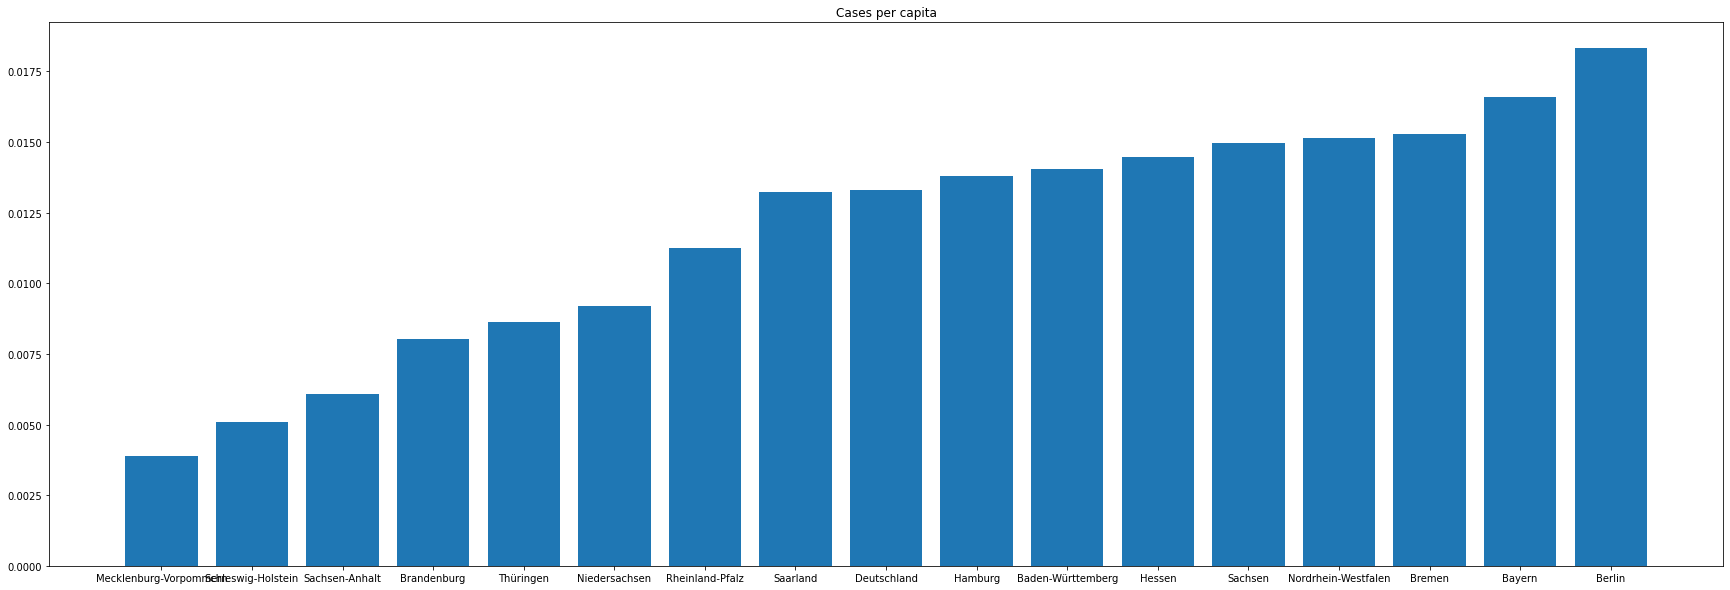

In [11]:
per_capita_dict = {bl: fälle / einwohner_dict[bl] for bl, fälle in bl_fälle.items()}
per_capita_dict = {bl: ratio for bl, ratio in sorted(per_capita_dict.items(), key=lambda x: x[1])}
plt.figure(figsize=(30, 10))
plt.title("Cases per capita")
plt.bar(per_capita_dict.keys(), per_capita_dict.values())
plt.show()

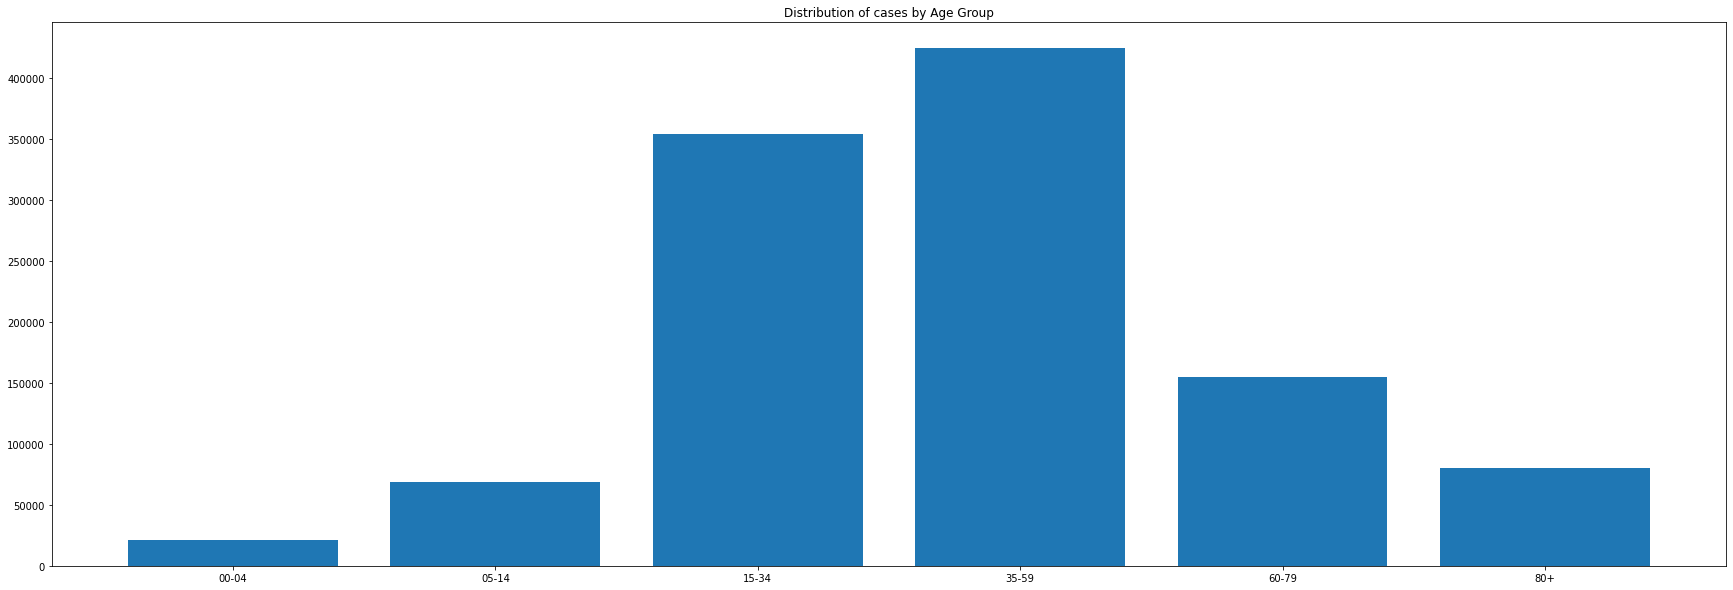

In [12]:
altersgruppe = data.groupby(["Altersgruppe"])
alter_dict = {}
for ag in data["Altersgruppe"].unique():
    fälle = altersgruppe.get_group(ag)["AnzahlFall"].sum()
    alter_dict[ag.replace("A", "")] = fälle
del alter_dict["unbekannt"]
alter_dict = {alter: fälle for alter, fälle in sorted(alter_dict.items(), key=lambda x: int(x[0][0]))}
plt.figure(figsize=(30, 10))
plt.title("Distribution of cases by Age Group")
plt.bar(alter_dict.keys(), height=alter_dict.values())
plt.show()

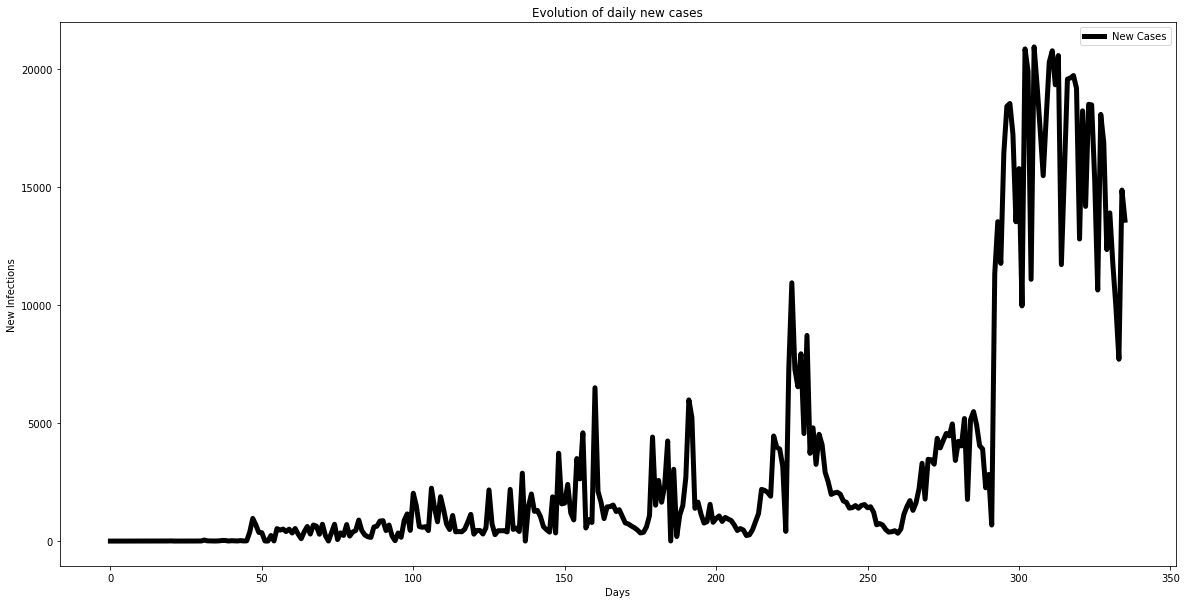

In [16]:
new_infections = group_cases_by_key("Refdatum", data)
new_infections = {date: cases for date, cases in reversed(list(new_infections.items()))}

plt.figure(figsize=(20, 10))
plt.title("Evolution of daily new cases")
plt.plot(new_infections.values(), linewidth=5, color="black")
plt.xlabel("Days")
plt.ylabel("New Infections")
plt.legend(["New Cases"])
plt.show()

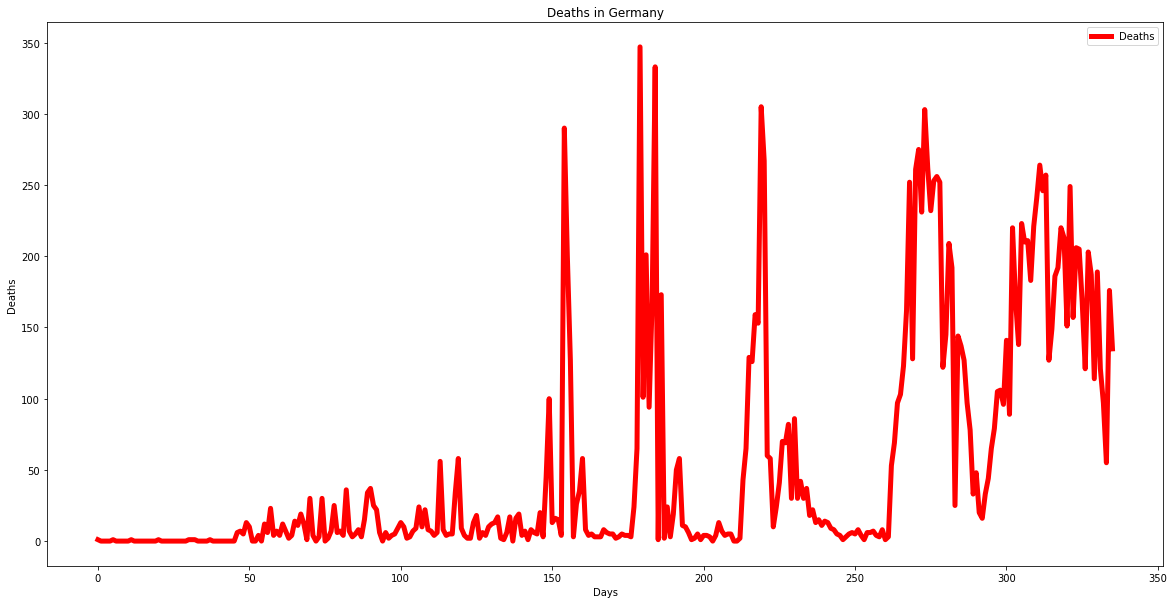

In [15]:
deaths = group_cases_by_key("Refdatum", data, values="AnzahlTodesfall")
deaths = {date: deaths for date, deaths in reversed(list(deaths.items()))}
plt.figure(figsize=(20, 10))
plt.title("Deaths in Germany")
plt.plot(deaths.values(), linewidth=5, color="red")
plt.xlabel("Days")
plt.ylabel("Deaths")
plt.legend(["Deaths"])